## Natural Language Processing

## 1. Imports

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./Job_data/data_cleaned_9_13_20.csv')

In [3]:
df.head()

,Job Title,Job Description,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary_min_grand,Salary_max_grand,Company_name,Salary_range
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,"New York, NY","New York, NY",201 to 500,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 M,Unknown,True,37,66,Vera Institute of Justice,29
1,Quality Data Analyst,Overview\r\n\r\nProvides analytical and techni...,3.8,"New York, NY","New York, NY",10000+,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 B,Unknown,False,37,66,Visiting Nurse Service of New York,29
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,"New York, NY","New York, NY",1001 to 5000,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,False,37,66,Squarespace,29
3,Data Analyst,Requisition NumberRR-0001939\r\nRemote:Yes\r\n...,4.1,"New York, NY","McLean, VA",201 to 500,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 M,Unknown,False,37,66,Celerity,29
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\r\n\r\nFanDuel Group is a ...,3.9,"New York, NY","New York, NY",501 to 1000,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 M,DraftKings,True,37,66,FanDuel,29


In [4]:
list_dicts = []
dict_row = {}

for row in df.index:
    
    split_nn = df.loc[row , 'Job Description'].split('\n\n')
    split_r  = df.loc[row , 'Job Description'].split('\r')

    if len(split_nn) > len(split_r):
        list_des = split_nn
    elif len(split_nn) < len(split_r):
        list_des = split_r
    else:
        list_des = 'ERROR'
    dict_row = {
        'Index'      : row,
        'List_split' : list_des,
        'Row_success': type(list_des)
    }
    list_dicts.append(dict_row)
df_splits = pd.DataFrame(list_dicts)

In [5]:
list_dicts = []
type(list_dicts)

list

In [6]:
mask = df_splits['List_split'] == 'ERROR'
list_errors = df_splits[mask].index

In [7]:
print(df.loc[list_errors[4], 'Job Description'])

Job Summary:Comprised of Disney's international media businesses and the Company's various streaming services, the Direct-to-Consumer and International (DTCI) segment aligns technology, content and distribution platforms to expand the Company's global footprint and deliver world-class, personalized entertainment experiences to consumers around the world.The Walt Disney Company's Direct-to-Consumer and International segment (DTCI) is a global, multiplatform media, technology and distribution organization for high-quality content created by Disney's Studio Entertainment and Media Networks groups.DTCI includes Disney's international media operations and the Company's direct-to-consumer businesses globally, including the upcoming Disney-branded direct-to-consumer streaming service, the Company's ownership stake in Hulu, and the ESPN+ sports streaming service, programmed in partnership with ESPN. BAMTECH Media, developer of the ESPN+ and Disney-branded streaming platforms, oversees all cons

grab first few words of each paragraph to sort out splits for the 810 errors

In [8]:
mask = df_splits['List_split'] != 'ERROR'
df_sections = df_splits[mask]

In [12]:
df_sections

,Index,List_split,Row_success
0,0,[Are you eager to roll up your sleeves and har...,<class 'list'>
1,1,"[Overview, \n, \nProvides analytical and techn...",<class 'list'>
2,2,[We’re looking for a Senior Data Analyst who h...,<class 'list'>
3,3,"[Requisition NumberRR-0001939, \nRemote:Yes, \...",<class 'list'>
4,4,"[ABOUT FANDUEL GROUP, \n, \nFanDuel Group is a...",<class 'list'>
...,...,...,...
5127,5127,"[#Columbus Data Science Tutor Jobs, \n, \nVars...",<class 'list'>
5129,5129,"[About Us, \n, \nTachyon Technologies is a Dig...",<class 'list'>
5130,5130,"[Job description, \nInterpret data, analyze re...",<class 'list'>
5131,5131,[Job DescriptionThe Security Analytics Data En...,<class 'list'>


In [13]:
 df_sections['List_split']

0       [Are you eager to roll up your sleeves and har...
1       [Overview, \n, \nProvides analytical and techn...
2       [We’re looking for a Senior Data Analyst who h...
3       [Requisition NumberRR-0001939, \nRemote:Yes, \...
4       [ABOUT FANDUEL GROUP, \n, \nFanDuel Group is a...
                              ...                        
5127    [#Columbus Data Science Tutor Jobs, \n, \nVars...
5129    [About Us, \n, \nTachyon Technologies is a Dig...
5130    [Job description, \nInterpret data, analyze re...
5131    [Job DescriptionThe Security Analytics Data En...
5133    [Help us transform patients' lives., \nAt UCB,...
Name: List_split, Length: 4324, dtype: object

In [50]:
list_results = []
for regex in [r'^[\w]+\s[\w]+\s[\w]+', r'^[\w]+\s[\w]+', r'^[\w]+']:
    for row in df_sections['List_split']:
        for paragraph in row:
            result = re.match(regex, paragraph)
            if type(result) != type(None):
                list_results.append(result.group())

In [51]:
list_results = [ x.capitalize() for x in list_results]

In [59]:
list_dicts = []
for value in set(list_results):
    list_dicts.append({
        'Count' : list_results.count(value),
        'Value' : value
    })
    #print(list_results.count(value), value)
df_value_counts = pd.DataFrame(list_dicts)

In [58]:
for value in set(list_results):
    print(type(value))

    #print

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [61]:
df_value_counts.sort_values('Count')

,Count,Value
0,1,Now looking
1638,1,Are you passionate
1636,1,Invenergy drives
1635,1,Vettery is
1630,1,Centrillion bioscience
...,...,...
1140,156,About
263,164,Data
926,181,The
1813,562,Job description


In [64]:
df_value_counts['Word_count'] = df_value_counts['Value'].map(lambda x: len(x.split(' ')))

In [67]:
mask = df_value_counts['Word_count'] == 3
df_value_counts[mask].sort_values('Count', ascending = False).head(20)

,Count,Value,Word_count
499,47,Who we are,3
2088,22,We are looking,3
1490,17,Want to help,3
2256,17,The data analyst,3
2459,15,Join the spark,3
1098,15,Job posting title,3
298,15,Senior data analyst,3
1715,14,We are hiring,3
1043,13,You will serve,3
63,13,Purpose of job,3


In [ ]:
# Next:
# - Sort out the obvious answers, "Who we are", We are looking", etc
# - start using DBScan/Clusters with cvec to find clusters.

In [72]:
list_results = []
for regex in [r'^[\w]+\s[\w]+\s[\w]+', r'^[\w]+\s[\w]+', r'^[\w]+']:
    for index in df_sections.index:
        for paragraph in df_sections.loc[index, 'List_split']:
            result = re.match(regex, paragraph)
            if type(result) != type(None):
                list_results.append({
                    'Index'     : index,
                    'Paragraph' : paragraph,
                    'Result'    : result.group().capitalize()})
df_results = pd.DataFrame(list_results)

In [72]:
list_results = []
for regex in [r'^[\w]+\s[\w]+\s[\w]+', r'^[\w]+\s[\w]+', r'^[\w]+']:
    
    for index in df_sections.index:
        
        for paragraph in df_sections.loc[index, 'List_split']:
            result = re.match(regex, paragraph)
            
            if type(result) != type(None):
                list_results.append({
                    'Index'     : index,
                    'Paragraph' : paragraph,
                    'Result'    : result.group().capitalize(),
                    ''})
df_results = pd.DataFrame(list_results)

In [74]:
df_results['P_word_count'] = df_results['Paragraph'].map(lambda x: len(x.split(' ')))

In [76]:
df_results['R_Word_count'] = df_results['Result'].map(lambda x: len(x.split(' ')))

In [79]:
mask = df_results['P_word_count'] >= 5
df_results[mask]

,Index,Paragraph,Result,P_word_count,R_Word_count
0,0,Are you eager to roll up your sleeves and harn...,Are you eager,48,3
2,6,Two Sigma is a different kind of investment ma...,Two sigma is,76,3
4,8,The Data Analyst is an integral member of the ...,The data analyst,50,3
5,10,NYU Grossman School of Medicine is one of the ...,Nyu grossman school,91,3
6,13,Investment Advisory Compliance Opportunity in ...,Investment advisory compliance,7,3
...,...,...,...,...,...
9382,5123,"As a member of our Software Engineering Group,...",As,104,1
9384,5125,"ICS is working with a Fortune 500, industry le...",Ics,87,1
9385,5126,ComResource is looking for a Principal Data En...,Comresource,8,1
9388,5131,Job DescriptionThe Security Analytics Data Eng...,Job,130,1


0 -> Not Applicable
1 -> About the company
2 -> Job Description
3 -> What They Are Looking For/Requirements

In [ ]:
df_results

In [72]:
list_results = []
for regex in [r'^[\w]+\s[\w]+\s[\w]+', r'^[\w]+\s[\w]+', r'^[\w]+']:
    for index in df_sections.index:
        for paragraph in df_sections.loc[index, 'List_split']:
            result = re.match(regex, paragraph)
            if type(result) != type(None):
                list_results.append({
                    'Index'     : index,
                    'Paragraph' : paragraph,
                    'Result'    : result.group().capitalize()})
df_results = pd.DataFrame(list_results)

In [59]:
list_dicts = []
for value in set(list_results):
    list_dicts.append({
        'Count' : list_results.count(value),
        'Value' : value
    })
    #print(list_results.count(value), value)
df_value_counts = pd.DataFrame(list_dicts)

In [19]:
# Imports
# Natural Language Processing libraries, initiations and functions
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel 
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords


# Preprocessing
def preprocess(text):
    text = re.sub(r'[^a-zA-Z]',' ', text.lower())
    tokens = word_tokenize(text)
    lemmer = WordNetLemmatizer()
    stop_words = stopwords.words("english")
    return " ".join([lemmer.lemmatize(word) for word 
                     in tokens if len(word) > 1 and not word in stop_words])



# Cvec, Standard
cvec = CountVectorizer(analyzer = "word",
                       min_df = 2,
                       preprocessor = preprocess,
                       stop_words = 'english') 
# Cvec DF
#df_words = pd.DataFrame(cvec.fit_transform(df['Job Description']).todense(), 
#                        columns=cvec.get_feature_names())


In [20]:
df_words = pd.DataFrame(cvec.fit_transform(df['Job Description']).todense(), 
                        columns=cvec.get_feature_names())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [23]:
!pip install textblob

In [24]:
# Sentament

from textblob import TextBlob

def Sentamentize(text):
    return TextBlob(str(text)).sentiment.polarity

ModuleNotFoundError: No module named 'textblob'

In [25]:
df_words

,aa,aaa,aaai,aaalac,aab,aadhikariatbayonesolutionsdotcom,aahrpp,aam,aamericorps,aamva,...,zoom,zoox,zpd,zr,zsers,zuckerberg,zulily,zuora,zurich,zynga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Most Common Words
def most_common_words(cveced_df):
    return cveced_df.sum().sort_values()[::-1]


In [27]:
series_most = most_common_words(df_words)

In [28]:
series_most.head(20)

data           61191
experience     31162
business       17709
work           16462
team           15577
skill          12383
year           10845
analysis       10582
ability         9542
development     8289
management      7846
science         7843
job             7816
project         7809
knowledge       7638
technology      7424
process         7327
support         7281
solution        7276
analytics       7251
dtype: int64

In [29]:
# NEEDS THE IMPORT
# LDA: Latent Dirichlet Allocation
from sklearn.decomposition import LatentDirichletAllocation
def LDA(df_column, num_topics = 3, num_words = 5):
    # cols are the words
    # rows are the topics
    topic_lists = []
    lda = LatentDirichletAllocation(n_components=num_topics, 
                         learning_method='online'
                   ) # Learning meathod stated for depreciation 
    lda.fit(cvec.fit_transform(df_column))
    for ix, topic in enumerate(lda.components_):
        topic_lists += [[cvec.get_feature_names()[i] for i 
              in lda.components_[ix].argsort()[:-num_words - 1:-1]]]

    return pd.DataFrame(topic_lists, columns=[ 'word_' + str(i) for i 
                                          in range(1, num_words+1)], 
                 index=range(1, num_topics + 1)) 

In [30]:
LDA(df['Job Description'], 5, 10)

,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10
1,data,experience,business,skill,year,work,team,management,solution,ability
2,experience,position,work,application,job,information,year,data,required,service
3,status,employment,disability,gender,opportunity,equal,veteran,protected,national,law
4,data,experience,work,research,skill,ability,analysis,report,health,development
5,data,experience,team,learning,business,science,work,product,machine,model


In [31]:
LDA(df['Job Description'], 3, 7)

,word_1,word_2,word_3,word_4,word_5,word_6,word_7
1,data,experience,business,skill,work,management,ability
2,experience,work,research,employment,development,required,status
3,data,experience,team,business,work,analytics,learning


In [32]:
df.head(3)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Estimate_minimum,Estimate_Maximum,temp
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37,66,<class 'str'>
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,False,37,66,<class 'str'>
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,False,37,66,<class 'str'>


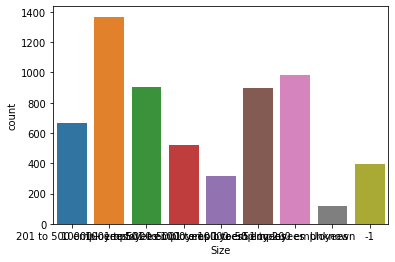

In [34]:
sns.countplot(df['Size'])

In [ ]:
df['Job Description'][2].split('\n\n')

Seperate by \n\n
add